<img src="https://qstom-it.com/wp-content/uploads/2019/04/logo.png"/>

<center>Aurélien Vannieuwenhuyze</center>

<center><H1>CLASSIFICATION DES IRIS</H1></center>

Dans ce cas pratique, nous allons utiliser le jeu de données des Iris considéré aujourd'hui comme un cas d'école. 
Néanmoins, ce jeu de données va nous permettre de mettre en pratique quelques fonctions liées à l'analyse de données en utilisant le module <b>Pandas</b> et la réalisation d'apprentissages à l'aide d'algorithmes de <b>machine learning</b> dédiés à la <b>classification</b>.

Enfin, nous terminerons par l'utilisation de réseau de neurones (<b>deep learning</b> à l'aide des frameworks <b>Tensorflow</b> et <b>Keras</b>

Pour toute remarque ou question, n'hésitez pas à nous contacter, nous nous ferons un plaisir de vous répondre !




<h2><u>Définition du problème</u></H2>

En tant que responsable botanique d’un grand château situé à Versailles, j’aimerais pouvoir disposer d’un logiciel capable d’identifier quelle espèce d’iris à élue domicile dans les jardins du château. 


<img src="http://qstom-it.com/img_jupyter/iris/2019-10-23_14h27_35.png"/>

<h1>1ère partie : Compréhension des données</h1>

<h2><u>Acquisition des données</u></h2>

<b>Le module SciKit-Learn comporte le jeu de données dont nous avons besoin.</b>

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print("> Données chargées")

> Données chargées


<b>Transformation des données en DataFrame grace au module Pandas </b>

In [3]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


<img src="http://qstom-it.com/img_jupyter/iris/2019-10-23_14h27_43.png"/>

<b>Récupération des données à prédire, c'est à dire l'espèce d'Iris et stockage de celles-ci dans un DataFrame</b> (0 = Setosa, 1 = Versicolor, 2 = Viriginica)

In [4]:
iris_type_df = pd.DataFrame(iris.target)
iris_type_df.head(5)

,0
0,0
1,0
2,0
3,0
4,0


<b>Fusion des deux DataFrame pour n'en obtenir qu'un seul qui contiendra les caractéristiques des Iris et l'espèce correspondante. Cette fusion se fait par l'ajout d'une colonne dans le premier DataFrame où seront copiées les données du Data Frame contenant les espèces</b>

In [5]:
#Creation d'une colonne "species" contant le dataFrame iris_type_df
iris_df['species'] = iris_type_df
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h2><u>Analyse des données</u></h2>

<b>Combiens avons nous d'observations et de caractéristiques ? </b>

In [6]:
iris_df.shape

(150, 5)

<i>150 observations et 5 caractéristiques</i>

<b>Comment se nomment les caractéristiques ?</b>

In [7]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

<b>On constate que les noms des caractéristiques comportent des espaces, ce n'est pas très "coding friendly". Nous allons donc les renommer</b>

In [8]:
iris_df = iris_df.rename(columns={"sepal length (cm)": "sepal_length",
                                  "sepal width (cm)": "sepal_width",
                                  "petal length (cm)": "petal_length",
                                  "petal width (cm)": "petal_width",
                   })

iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<b>Quel est le type des différentes caractéristiques ?</b>

In [9]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int32
dtype: object

<i>Toutes les caractéristiques sont de type numériques</i>

<b>Avons nous des données manquantes ?</b>

In [10]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<i>Aucune donnée manquante</i>

<b>Combien avons nous d'iris de chaque espèce ?</b>(0 = Setosa, 1 = Versicolor, 2 = Viriginica) 
<b>Les données sont-elles équilibrées ?</b>

In [11]:
print(iris_df["species"].value_counts())

2    50
1    50
0    50
Name: species, dtype: int64


<i>Nous disposons de 150 observations dont la répartition des espèces est équilibrée (3 espèces comportant chacune 50 observations)</i>

In [ ]:
iris_df.loc[:49]

In [ ]:
iris_df.loc[50:99]

In [ ]:
iris_df.loc[100:149]

<b>Les données ne sont pas mélangées (les iris sont classés par espèce) ce qui peut géner l'apprentissage. Nous allons donc corriger ce point</b> 

In [12]:
iris_df = iris_df.sample(frac=1).reset_index(drop=True)
print(iris_df.head(10))

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.6          3.0           4.1          1.3        1
1           4.8          3.0           1.4          0.3        0
2           7.1          3.0           5.9          2.1        2
3           5.4          3.7           1.5          0.2        0
4           6.7          3.0           5.0          1.7        1
5           6.3          3.3           6.0          2.5        2
6           5.9          3.0           5.1          1.8        2
7           5.5          2.6           4.4          1.2        1
8           5.9          3.2           4.8          1.8        1
9           6.4          2.7           5.3          1.9        2


<b>Visualisation de la corrélation des données entre elles</b>

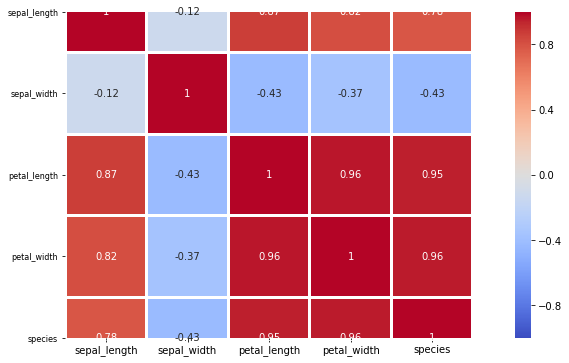

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
g = sns.heatmap(iris_df.corr(),
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            linewidths=2,
            square=True);
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
plt.show()

<i>On note une forte correlation entre la caractéristique à prédire (species) et les caractéristique des pétales</i>

<b>Visualisation des espèces en fonction de leur sépales</b>

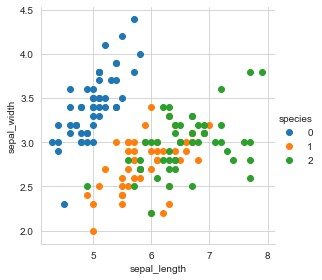

In [15]:
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid");
sns.FacetGrid(iris_df, hue="species", size=4) \
.map(plt.scatter, "sepal_length", "sepal_width") \
.add_legend();
plt.show()

<i>On constate une catégorisation possible pour les iris de type sétosa. Cependant cela reste plus complexe pour les iris virginica et versicolor</i>

<b>Visualisation des espèces en fonction de leur pétales </b>

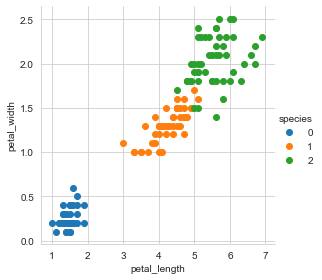

In [16]:
import seaborn as sns
sns.set_style("whitegrid");
sns.FacetGrid(iris_df, hue="species", size=4) \
.map(plt.scatter, "petal_length", "petal_width") \
.add_legend();
plt.show()

<i>Cette fois ci la catégorisation des différentes espèces d'iris est plus marquée à l'aide des caractéristiques des pétales comme nous l'indiquait le graphique des corrélations</i> 

<h1>2ème partie : Machine learning</h1>

<h2><u>Recherche d'un modèle</u></h2>

Nous sommes en présence d'un apprentissage <b>supervisé</b> répondant un à problème de <b>classification</b>. 
Dans ce cas, nous pouvons utiliser les modèles suivants:

- La Regression logistique
- Machine vecteurs de support (SVM)
- KNN (K plus proches voisins)
- L'arbre de décision
- Les rorêts aléatoires
- Naive Bayes

Nous allons donc créer un tableau chargé de contenir les différents algorithmes à tester

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

algorithmes = []
algorithmes.append(('Regression Logistique', LogisticRegression()))
algorithmes.append(('Machine vecteurs de support', SVC()))
algorithmes.append(('KNN', KNeighborsClassifier()))
algorithmes.append(('Arbre de decision', DecisionTreeClassifier()))
algorithmes.append(('Forêt aléatoire',RandomForestClassifier()))
algorithmes.append(('Naive Bayes', GaussianNB()))

print("Tableau créé...")

Tableau créé...


<b>La première étape va consister à selectionner les caractéristiques relatives à l'apprentissage (X) et celle relative à la prédiction (Y) </b>

In [27]:
X_APPRENTISSAGE = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
Y_APPRENTISSAGE = iris_df[['species']]

print("Découpage effectué...")

Découpage effectué...


Nous pouvons tester les algorithmes les uns aprés les autres, cependant pour nous faciliter cette tache nous allons utiliser un procédé appelé cross_validation.

La première étape consiste à découper nos données (X et Y) en petits groupes (fold) qui serviront de base d'apprentissage et de test. Ce découpage est réalisé à l'aide de la fonction KFold.
Dans notre cas, nous allons découper nos données en 4 petits groupes.

Voici comment la cross validation s'opère pour un algorithme :

- Le premier groupe sert de groupe de test
- Les groupes 2,3,4 servent pour l'apprentissage
- L'algorithme apprend sur les 3 groupes d'apprentissage
- Une validation de cet apprentissage est fait sur le groupe de test
- Une précision de l'apprentissage est réalisé
------
- Le second groupe sert de groupe de test
- Les groupes 1,3,4 servent pour l'apprentissage
- L'algorithme apprend sur les 3 groupes d'apprentissage
- Une validation de cet apprentissage est fait sur le groupe de test
- Une précision de l'apprentissage est réalisé

- etc...

A l'issu des différents apprentissages, une moyenne des précisions est calculé donnant alors la précision de l'algorithme.

pour plus d'information sur la cross validation, vous pouvez consulter cette adresse : 
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection


<img src="http://qstom-it.com/img_jupyter/iris/2019-10-23_14h24_45.png"/>

<img src="http://qstom-it.com/img_jupyter/iris/2019-10-23_14h25_11.png"/>

In [31]:
#On ignore les warning
import warnings
warnings.filterwarnings("ignore")

#Fonction de selection de modèle
from sklearn import model_selection

#KFOld
nombreDeGroupes = 4
nombreIterations = nombreDeGroupes
kfold = model_selection.KFold(n_splits=nombreDeGroupes, random_state=101)

#On mesure la performance des algorithmes sur leur précision
score = 'accuracy'

#On stock les différents résultats
scores = []


for nom_algorithme, algorithme in algorithmes:
    kfold = model_selection.KFold(n_splits=nombreDeGroupes, random_state=101)
    print("\n-- "+nom_algorithme+"--")
    
    #Appprentissage 
    cross_validation_resultats = model_selection.cross_val_score(algorithme, X_APPRENTISSAGE, Y_APPRENTISSAGE, cv=nombreIterations, scoring=score)
    print("Précisions de chaque apprentissage : "+str(cross_validation_resultats))
    scores.append(cross_validation_resultats.mean())
    print("Moyenne des précisions = "+str(cross_validation_resultats.mean()))

print("\n")
print("*******************************************")
print("Meilleur algorithme : ")
print(" - "+algorithmes[scores.index(max(scores))][0]+" avec "+str(round((scores[scores.index(max(scores))])*100,2))+ " %")
print("*******************************************")
print("")


-- Regression Logistique--
Précisions de chaque apprentissage : [1.         0.94871795 0.86111111 1.        ]
Moyenne des précisions = 0.9524572649572649

-- Machine vecteurs de support--
Précisions de chaque apprentissage : [0.97435897 1.         0.94444444 0.97222222]
Moyenne des précisions = 0.9727564102564104

-- KNN--
Précisions de chaque apprentissage : [0.97435897 0.94871795 0.94444444 1.        ]
Moyenne des précisions = 0.9668803418803418

-- Arbre de decision--
Précisions de chaque apprentissage : [0.97435897 0.94871795 0.94444444 0.97222222]
Moyenne des précisions = 0.9599358974358974

-- Forêt aléatoire--
Précisions de chaque apprentissage : [0.97435897 0.94871795 0.88888889 0.97222222]
Moyenne des précisions = 0.9460470085470085

-- Naive Bayes--
Précisions de chaque apprentissage : [0.94871795 0.94871795 0.91666667 1.        ]
Moyenne des précisions = 0.953525641025641


*******************************************
Meilleur algorithme : 
 - Machine vecteurs de support ave

<h1>2ème partie : Deep Learning</h1>

<h2><u>Architecture du réseau de neurones</u></h2>

<img src="http://qstom-it.com/img_jupyter/iris/2019-10-23_14h26_07.png"/>

Nous avons choisi de mettre en place cette architecture :

 - Nombre de neurones en entrée = Nombre de caractéristique explicatives = 4
 - Nombre de neurones en sortie = Nombre de classes à prédire = 3 (0 = Setosa, 1 = Versicolor, 2 = Viriginica)
 - Nombre de couche cachées = 1
 - Nombre de neurones dans la couche cachée = moyenne entre le nombre de neurones en entrée et en sortie = 3
 - Un biais pour la couche d'entrée
 - Un biais pour la couche de sortie
 
 Pour les fonctions d'activation et d'erreur nous utiliserons (Fonctions communément utilisées pour ce type de problème) :
 - Relu pour la fonction d'activation de la couche cachée
 - Softmax pour la fonction d'activation de la dernière couche
 - Cross Entropy pour la fonction d'erreur
  

<h2><u>Utilisation de Tensorflow</u></h2>

<b>Hot encoding des espèces</b><br>

Chaque observation contient un numéro d'espèce (caractéristique species) : 0 = Setosa, 1 = Versicolor, 2 = Viriginica
Dans notre réseau de neurones, nous avons 3 neurones de sorties correspondant chacun à une espèce.
Nous allons donc devoir traduire l'espèce de l'observation pour qu'elle soit compréhensible par notre réseau de neurones : 

- Si c'est un iris setosa nous aurons [1,0,0]  1 pour le premier neurone et 0 pour les autres
- Si c'est un iris versicolor nous aurons [0,1,0] 1 pour le second neurone et 0 pour les autres
- Si c'est un iris virginica nous aurons [0,0,1] 1 pour le troisième neurone et 0 pour les autres

Pour réaliser cela, nous allons ajouter 3 colonnes à notre dataframe grâce à la méthode get_dummies du module pandas.


In [32]:
import numpy as np

iris_df = pd.get_dummies(iris_df, columns=['species'])
print(iris_df.head(10))

   sepal_length  sepal_width  petal_length  petal_width  species_0  species_1  \
0           5.1          3.5           1.4          0.2          1          0   
1           4.9          3.0           1.4          0.2          1          0   
2           4.7          3.2           1.3          0.2          1          0   
3           4.6          3.1           1.5          0.2          1          0   
4           5.0          3.6           1.4          0.2          1          0   
5           5.4          3.9           1.7          0.4          1          0   
6           4.6          3.4           1.4          0.3          1          0   
7           5.0          3.4           1.5          0.2          1          0   
8           4.4          2.9           1.4          0.2          1          0   
9           4.9          3.1           1.5          0.1          1          0   

   species_2  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6  

<b>Découpage des données en jeu d'apprentissage (70% du jeu de données complet) et jeu de test (30% du jeu de données complet)</b>

In [33]:
#Extraction des caractéristiques
X = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris_df [['species_0','species_1','species_2']]

#Transformation des données en tableau numpy (Pour Tensorflow)
y = np.array(y, dtype='float32')
X = np.array(X, dtype='float32')

#Decoupage en jeu de d'apprentissage et de test
#Test size = 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print("Découpage effectué...")

Découpage effectué...


<b>Paramétrage du réseau de neurones</b>

In [35]:
import tensorflow as tf

# Couches d'entrée et de sortie
couche_entree = tf.placeholder(shape=[None, 4], dtype=tf.float32)
couche_sortie = tf.placeholder(shape=[None, 3], dtype=tf.float32)

#Nombre de neurones sur la couche cachée
nb_neurones_couche_cachée = 3

# Poids des différentes couches
w1 = tf.Variable(tf.random_normal(shape=[4,nb_neurones_couche_cachée])) # Couche entrée -> couche cachée
w2 = tf.Variable(tf.random_normal(shape=[nb_neurones_couche_cachée,3])) # couche cachée -> couche de sortie


#Biais
b1 = tf.Variable(tf.random_normal(shape=[nb_neurones_couche_cachée]))   #Biais de la couche d'entrée
b2 = tf.Variable(tf.random_normal(shape=[3]))   # Biais de la couche cachée

#Fonctions d'activation :
hidden_output = tf.nn.relu(tf.add(tf.matmul(couche_entree, w1), b1)) # Relu
final_output = tf.nn.softmax(tf.add(tf.matmul(hidden_output, w2), b2)) #Softmax

print("Réseau paramétré...")

Réseau paramétré...


<b>Fonction d'erreur à minimiser</b>

Les fonction d'activation et de minimisation d'erreur utilisées dans notre réseau de neurones, sont propres à une configuration dédiée à la classification devenue "Standard" pour son obtention de bons résultats.
Cette configuration comporte une activation de type softmax pour la dernière couche de neurone et une fonction d'erreur de type cross entropy.
Pour plus d'informations: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

In [36]:
#Formule de calcul de l'erreur (cross entropy)
erreur = tf.reduce_mean(-tf.reduce_sum(couche_sortie * tf.log(final_output), axis=0))

# Minimisation de l'erreur à l'aide de l'algorithme de descente de gradient comprenant
# un taux d'apprentissage de 0.001
optimiseur = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(erreur)

print("Paramétrage effectué...")

Paramétrage effectué...


<b>Initialisation du réseau et apprentissage</b>

In [41]:
# Initialisation des variables (poids...)
init = tf.global_variables_initializer()

#Nombre de boucles d'apprentissage
epochs = 1000 

#Session tensorflow
session = tf.Session()
session.run(init)

#Création d'un tableau afin de représenter l'erreur commise lors de l'apprentissage
Graphique_Erreur=[]

# Apprentissage
print('Apprentissage du modèle...')
for i in range(1, (epochs + 1)):
    #Apprentissage
    session.run(optimiseur, feed_dict={couche_entree: X_train, couche_sortie: y_train})
    #Calcul de l'erreur
    erreur_epoch = session.run(erreur, feed_dict={couche_entree: X_train, couche_sortie: y_train})
    Graphique_Erreur.append(erreur_epoch)
    print('Epoch', i, '|', 'Erreur :',erreur_epoch )




Apprentissage du modèle...
Epoch 1 | Erreur : 113.9444
Epoch 2 | Erreur : 70.2732
Epoch 3 | Erreur : 49.659748
Epoch 4 | Erreur : 40.22095
Epoch 5 | Erreur : 36.711956
Epoch 6 | Erreur : 35.204144
Epoch 7 | Erreur : 34.31513
Epoch 8 | Erreur : 33.639107
Epoch 9 | Erreur : 33.04726
Epoch 10 | Erreur : 32.535233
Epoch 11 | Erreur : 32.08742
Epoch 12 | Erreur : 31.65386
Epoch 13 | Erreur : 31.241137
Epoch 14 | Erreur : 30.833984
Epoch 15 | Erreur : 30.441391
Epoch 16 | Erreur : 30.058708
Epoch 17 | Erreur : 29.685783
Epoch 18 | Erreur : 29.323196
Epoch 19 | Erreur : 28.97151
Epoch 20 | Erreur : 28.629213
Epoch 21 | Erreur : 28.285852
Epoch 22 | Erreur : 27.955717
Epoch 23 | Erreur : 27.638578
Epoch 24 | Erreur : 27.334177
Epoch 25 | Erreur : 27.040026
Epoch 26 | Erreur : 26.757082
Epoch 27 | Erreur : 26.484741
Epoch 28 | Erreur : 26.223106
Epoch 29 | Erreur : 25.97074
Epoch 30 | Erreur : 25.72734
Epoch 31 | Erreur : 25.492552
Epoch 32 | Erreur : 25.26596
Epoch 33 | Erreur : 25.041176
Epoc

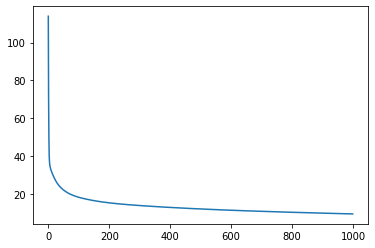

In [42]:
#Affichage du graphique
plt.plot(Graphique_Erreur)
plt.show()

<b>Réalisation de quelques prédictions</b>

In [43]:
nbPredictions = 0
nbBonnesPredictions = 0

for i in range(len(X_test)):
    nbPredictions = nbPredictions+1
    
    #Prediction attendue
    attendu  = y_test[i]
    
    #Prediction
    predition = np.rint(session.run(final_output, feed_dict={couche_entree: [X_test[i]]}))
    
    
    print('Reel:', y_test[i], 'Predit:', predition[0])
    if (str(y_test[i]) == str(predition[0])):
        nbBonnesPredictions = nbBonnesPredictions+1
        
print ("\nPrecision = "+str((nbBonnesPredictions/nbPredictions)*100)+" %")  

Reel: [1. 0. 0.] Predit: [1. 0. 0.]
Reel: [1. 0. 0.] Predit: [1. 0. 0.]
Reel: [1. 0. 0.] Predit: [1. 0. 0.]
Reel: [0. 0. 1.] Predit: [0. 0. 1.]
Reel: [0. 1. 0.] Predit: [0. 1. 0.]
Reel: [0. 0. 1.] Predit: [0. 0. 1.]
Reel: [0. 1. 0.] Predit: [0. 1. 0.]
Reel: [0. 1. 0.] Predit: [0. 1. 0.]
Reel: [0. 0. 1.] Predit: [0. 0. 1.]
Reel: [1. 0. 0.] Predit: [1. 0. 0.]
Reel: [0. 0. 1.] Predit: [0. 0. 1.]
Reel: [1. 0. 0.] Predit: [1. 0. 0.]
Reel: [1. 0. 0.] Predit: [1. 0. 0.]
Reel: [0. 0. 1.] Predit: [0. 0. 1.]
Reel: [0. 0. 1.] Predit: [0. 0. 1.]
Reel: [0. 1. 0.] Predit: [0. 1. 0.]
Reel: [0. 1. 0.] Predit: [0. 1. 0.]
Reel: [0. 1. 0.] Predit: [0. 1. 0.]
Reel: [1. 0. 0.] Predit: [1. 0. 0.]
Reel: [0. 0. 1.] Predit: [0. 0. 1.]
Reel: [0. 1. 0.] Predit: [0. 1. 0.]
Reel: [1. 0. 0.] Predit: [1. 0. 0.]
Reel: [0. 1. 0.] Predit: [0. 1. 0.]
Reel: [0. 1. 0.] Predit: [0. 1. 0.]
Reel: [0. 1. 0.] Predit: [0. 1. 0.]
Reel: [0. 1. 0.] Predit: [0. 1. 0.]
Reel: [0. 1. 0.] Predit: [0. 1. 0.]
Reel: [0. 0. 1.] Predit: [0.

<h2><u>Utilisation de KERAS</u></h2>

<b>Configuration du réseau de neurones</b>

In [45]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

#Suppression des warning (3 = les messages de type INFO, WARNING et ERROR seront non affichés)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


#Modèle de type séquentiel (Empilement)
model = Sequential()

#Couche d'entrée 
#(Nombre de neurones en sortie, nombre de neurones en entrée, nom, fonction d'activation)
model.add(Dense(3, input_dim=4, name='couche_entree',activation='relu'))

#Couche de sortie
model.add(Dense(3, activation='softmax', name='couche_sortie'))


print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
couche_entree (Dense)        (None, 3)                 15        
_________________________________________________________________
couche_sortie (Dense)        (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
None


<b>Initialisation du réseau et apprentissage</b>

In [47]:
#Suppression des warning (3 = les messages de type INFO, WARNING et ERROR seront non affichés)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


#On retrouve la fonction d'erreur cross_entropy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Apprentissage
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
105/105 [==============================] - 0s 3ms/step - loss: 0.5087 - acc: 0.7143
Epoch 2/500
105/105 [==============================] - 0s 48us/step - loss: 0.5083 - acc: 0.7143
Epoch 3/500
105/105 [==============================] - 0s 66us/step - loss: 0.5078 - acc: 0.7143
Epoch 4/500
105/105 [==============================] - 0s 57us/step - loss: 0.5074 - acc: 0.7143
Epoch 5/500
105/105 [==============================] - 0s 57us/step - loss: 0.5070 - acc: 0.7143
Epoch 6/500
105/105 [==============================] - 0s 57us/step - loss: 0.5067 - acc: 0.7143
Epoch 7/500
105/105 [==============================] - 0s 48us/step - loss: 0.5063 - acc: 0.7143
Epoch 8/500
105/105 [==============================] - 0s 67us/step - loss: 0.5059 - acc: 0.7143
Epoch 9/500
105/105 [==============================] - 0s 57us/step - loss: 0.5056 - acc: 0.7143
Epoch 10/500
105/105 [==============================] - 0s 67us/step - loss: 0.5052 - acc: 0.7143
Epoch 11/500
105/105 [========

<b>Quelques prédictions</b>

In [48]:
#Realisation des prédictions
predictions = model.predict_classes(X_test)

nbPredictions = 0
nbBonnesPredictions = 0

# show the inputs and predicted outputs
for i in range(len(predictions)):
    nbPredictions = nbPredictions +1
    print("Attendu=%s, Attendu=%s, Predicted=%s" % (y_test[i],np.argmax(y_test[i]),predictions[i]))
    if (np.argmax(y_test[i]) == predictions[i]):
        nbBonnesPredictions = nbBonnesPredictions +1

print ("\nPrecision = "+str((nbBonnesPredictions/nbPredictions)*100)+" %")  

Attendu=[1. 0. 0.], Attendu=0, Predicted=0
Attendu=[1. 0. 0.], Attendu=0, Predicted=0
Attendu=[1. 0. 0.], Attendu=0, Predicted=0
Attendu=[0. 0. 1.], Attendu=2, Predicted=1
Attendu=[0. 1. 0.], Attendu=1, Predicted=1
Attendu=[0. 0. 1.], Attendu=2, Predicted=2
Attendu=[0. 1. 0.], Attendu=1, Predicted=1
Attendu=[0. 1. 0.], Attendu=1, Predicted=1
Attendu=[0. 0. 1.], Attendu=2, Predicted=2
Attendu=[1. 0. 0.], Attendu=0, Predicted=0
Attendu=[0. 0. 1.], Attendu=2, Predicted=2
Attendu=[1. 0. 0.], Attendu=0, Predicted=0
Attendu=[1. 0. 0.], Attendu=0, Predicted=0
Attendu=[0. 0. 1.], Attendu=2, Predicted=2
Attendu=[0. 0. 1.], Attendu=2, Predicted=2
Attendu=[0. 1. 0.], Attendu=1, Predicted=1
Attendu=[0. 1. 0.], Attendu=1, Predicted=1
Attendu=[0. 1. 0.], Attendu=1, Predicted=1
Attendu=[1. 0. 0.], Attendu=0, Predicted=0
Attendu=[0. 0. 1.], Attendu=2, Predicted=2
Attendu=[0. 1. 0.], Attendu=1, Predicted=1
Attendu=[1. 0. 0.], Attendu=0, Predicted=0
Attendu=[0. 1. 0.], Attendu=1, Predicted=1
Attendu=[0.